# Import Required Libraries and Load + Get Basic Information of The Data

## Import Required Libraries and Load Data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('social_media_usage.csv')

## Analyze and Get Basic Information of The Data

In [114]:
df.head()

,Timestamp,Age,Gender,Major,Hours on Social Media,Social Media Platform,Posting Frequency,Friends/Followers,Academic Performance
0,12/13/2024 14:02:02,25,Male,Computer Science,3.0,Instagram,Rarely,8,Poor
1,12/13/2024 14:05:42,25,Male,Computer Science,3.0,Facebook,Rarely,30,Average
2,12/13/2024 14:07:30,24,Female,Computer Science,3.0,Facebook,Sometimes,600,Average
3,12/13/2024 14:13:50,25,Male,Computer Science,1.0,Facebook,Rarely,500,Poor
4,12/13/2024 14:17:34,24,Male,Computer Science,3.0,Facebook,Rarely,20,Average


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              589 non-null    object 
 1   Age                    1019 non-null   int64  
 2   Gender                 1012 non-null   object 
 3   Major                  1001 non-null   object 
 4   Hours on Social Media  1019 non-null   float64
 5   Social Media Platform  1019 non-null   object 
 6   Posting Frequency      1018 non-null   object 
 7   Friends/Followers      1018 non-null   object 
 8   Academic Performance   1014 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 71.8+ KB


Missing Data Count: 
Timestamp                430
Age                        0
Gender                     7
Major                     18
Hours on Social Media      0
Social Media Platform      0
Posting Frequency          1
Friends/Followers          1
Academic Performance       5
dtype: int64


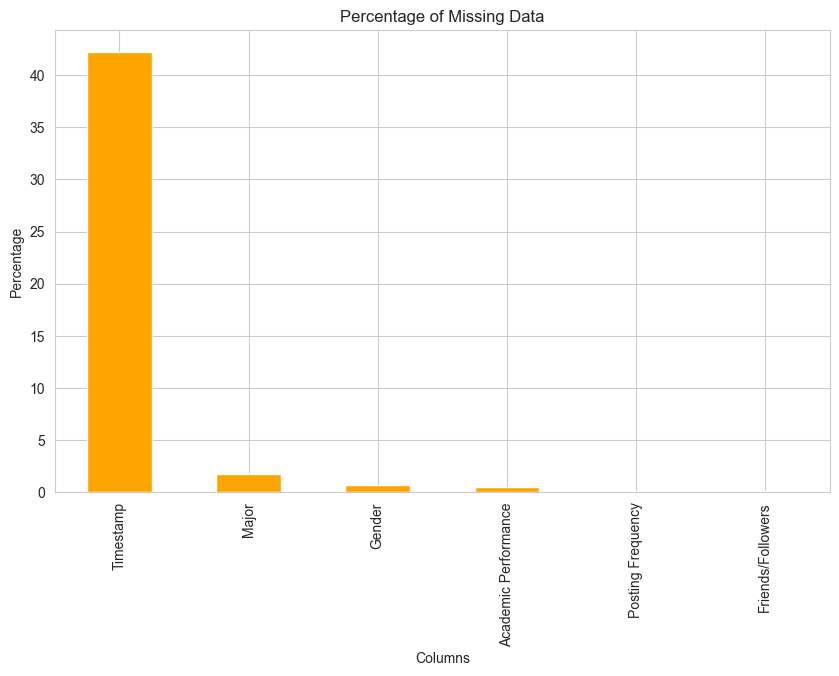

In [116]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


It is seen that there are some missing datas present in the dataset which are of Major,Gender,Posting Frequency, Academic Performance and Social Media Platform columns. We will fill these missing values with the most frequent value in the column.

# Preprocessing

## Handle Missing Data

In [117]:
df.drop("Timestamp", axis=1, inplace=True)

In [118]:
categorical_columns = ['Major','Gender','Social Media Platform']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
ordinal_columns = ['Posting Frequency', 'Academic Performance']
for col in ordinal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Missing datas are being filled up by imputed values.

In [119]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 13
Number of duplicate rows: 0


There are no duplicate rows in the dataset.

In [120]:
df.dropna(inplace=True)
df.isnull().sum()

Age                      0
Gender                   0
Major                    0
Hours on Social Media    0
Social Media Platform    0
Posting Frequency        0
Friends/Followers        0
Academic Performance     0
dtype: int64

In [121]:
import re
def extract_numeric(value):
        match = re.search(r'\d+', str(value))
        return int(match.group()) if match else None

df['Friends/Followers']=df['Friends/Followers'].apply(extract_numeric)

Final checking all null values are imputed and removing + from the friends column.

In [122]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1005 non-null   int64  
 1   gender                 1005 non-null   object 
 2   major                  1005 non-null   object 
 3   hours_on_social_media  1005 non-null   float64
 4   social_media_platform  1005 non-null   object 
 5   posting_frequency      1005 non-null   object 
 6   friends/followers      1005 non-null   int64  
 7   academic_performance   1005 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 70.7+ KB


the above code is written to convert names in smaller case letters and also join them using underscore.

# Univariate Analysis

In [123]:
fig = px.histogram(df, x='hours_on_social_media', nbins=10, title='Distribution of Hours Spent on Social Media')
fig.update_layout(xaxis_title='Hours', yaxis_title='Frequency',bargap=0.1)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Most of the people spend 0-8 hours on social media. among which highest amount of people spend 2-3.9 hours on social media. 2nd highest is 0-1.9 hours. and 3rd highest is 4-5.9 hours respectively. THere are very much less peoples who use excessive social media greater than or equal to 8 hours.

In [124]:
# Distribution of primary social media platforms
df["social_media_platform"] = df["social_media_platform"].str.strip()
df['social_media_platform'] = df['social_media_platform'].replace({
    'X/Twitter' : 'Twitter'
})
columns_to_drop = ['Whatsapp','Youtube','YouTube','Reddit','WhatsApp']
df = df[~df['social_media_platform'].isin(columns_to_drop)]

platform_counts = df['social_media_platform'].value_counts().reset_index()
platform_counts.columns = ['Social Media Platform', 'Count']

fig = px.bar(platform_counts,
              x='Social Media Platform', 
              y='Count', 
              title='Primary Social Media Platform Usage', 
              color='Count', 
              color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Social Media Platform', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


most of the people use Facebook(415 people) as their primary social media platform. followed by Instagram(191) and LinkedIn(141) which is very close to Twitter(139). The least used social media platform is Snapchat(53).

In [125]:
#Gender {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].replace({
    '1' : 'Female'
})
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts,
             names='Gender', 
             values='Count', 
             title='Gender Distribution',
             color='Gender', 
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Here Gender class is not equally distributed. The majority of the students are male with 59.6% and the minority are female with 40.4%.

In [126]:
#Performance {1:good ,2: average, 3:poor}
performance_counts = df['academic_performance'].value_counts().reset_index()
performance_counts.columns = ['Academic Performance', 'Count']

fig = px.bar(performance_counts, 
              x='Academic Performance', 
              y='Count', 
              title='Distribution of Academic Performance', 
              color='Count', 
              color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Academic Performance', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Most of the people have average academic performance with a count of 432 which is approximately 43.2% of the dataset. Least of them has poor academic performance with a count of 238 which is approximately 23.8% of the dataset. The good academic people are of 33% of the total people with a count of 330.

In [127]:
# posting_frequency distribution
# Never (0), Rarely (1), Sometimes (2), Often (3), Daily (4)
df["posting_frequency"] = df["posting_frequency"].replace({
    'Always' : 'Daily'
})
fig = px.histogram(df, x='posting_frequency', nbins=5, 
                   title="Frequency of Social Media Posting",
                   color_discrete_sequence=['gold','green'])

fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(xaxis_title="Posting Frequency",
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  bargap=0.1)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Most of the people post rarely on socical media, with a count of 442 which is approximately 44.2% of the dataset. Least of them post daily on social media, with a count of 62 which is approximately 6.2% of the dataset. it is seen that people maximum post sometimes in social media and the persons with often and never posts are of medium number.

In [128]:
# Major Distribution
df["major"] = df["major"].str.strip()
df['major'] = df['major'].replace({
    'CSE': 'CSE',
    'Computer Science': 'CSE',
    'Computer Science & Engineering': 'CSE',
    'IT': 'CSE',
    'CS': 'CSE',
    'BBA': 'Business',
    'Agricultural': 'Agriculture',
    'BSAg': 'Agriculture',
    'Law' : 'Arts',
    'English' : 'Arts',
    'Economics' : 'Arts',
    'Social Work' : 'Arts',
    'Ag': 'Agriculture',
    'CE' : 'Engineering',
    'GE' : 'Engineering',
    'IPE': 'Engineering',
    'nuclear engineering': 'Engineering',
    'Bsag': 'Agriculture',
    'ME' : 'Engineering',
    'Bss': 'Arts',
    'BA' : 'Arts',
    'Mechanical' : 'Engineering',
    'Textile' : 'Engineering',
    'Textile Engineering': 'Engineering',
    'Dyes and Chemical Engineering' : 'Engineering',
    'Nuclear Engineering':'Engineering',
    'Information Technology': 'CSE',
    'Finance':'Business',
    'Management':'Business',

})
majors_to_drop = ["Education", "Physics", "MBBS", "Chemistry","Bio-chemistry","Other"]
df = df[~df['major'].isin(majors_to_drop)]
major_counts = df['major'].value_counts().reset_index()
major_counts.columns = ['major', 'Count']

fig = px.pie(major_counts, 
             names='major', 
             values='Count', 
             title='Major Distribution',
             color='major', 
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


In [129]:
df['major'].value_counts()

major
CSE            629
EEE            110
Engineering     77
Business        57
Psychology      46
Biology         36
Arts            25
Agriculture     12
Name: count, dtype: int64

Most people of the dataset belong to cse major which is more half of the total records(63.4%) and least of them belong to agriculture(1.21%).

## Bivariate Analysis

In [130]:
#Academic Performance vs Hours on Social Media
fig = px.box(df, x='academic_performance', y='hours_on_social_media', 
              title="Hours on Social Media vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title="Academic Performance Levels",
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


This analysis is very, very interesting. It shows that people who spend more time on social media have lower academic performance. This could be due to the fact that social media can be a distraction and can take up a lot of time, which can be used for studying and other important activities. It is important for students to balance their social media usage with their academic responsibilities. To be specific the people with good academic result has a median of 2 hours on social media and the people with average academic result has a median of 3 hours and the people with bad academic result has a median of 3 hours on social media but the range of usage in poor performace has a large range of values specially in higher side. However, there are some interesting observation is seen that there exists a few people with very good academic result who spend more than 7 hours on social media and there are also some people with bad academic result who spend less than 4 hours on social media. This shows that academic performance is not only determined by the amount of time spent on social media but also may depend on other factors such as study habits, time management skills and motivation etc.

In [131]:
def remove_outliers_by_category(df, numeric_column, category_column):
    def remove_outliers(group):
        Q1 = group[numeric_column].quantile(0.25)
        Q3 = group[numeric_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return group[(group[numeric_column] >= lower_bound) & (group[numeric_column] <= upper_bound)]
    df_cleaned = df.groupby(category_column, group_keys=False).apply(remove_outliers)
    return df_cleaned
df = remove_outliers_by_category(df, 'hours_on_social_media', 'academic_performance')

In [132]:
#Academic Performance vs number of friends on social media
fig = px.box(df, x='academic_performance', y='friends/followers', 
              title="friends/followers vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title="Academic Performance Levels",
                  yaxis_title="friends/followers", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


all classes have somewhat equal means in case of number of friends or followers ranging from 651 to 714 average in social media and it is not a good indicatior of the academic performance. Those who have average academic result have slightly low number of friends.

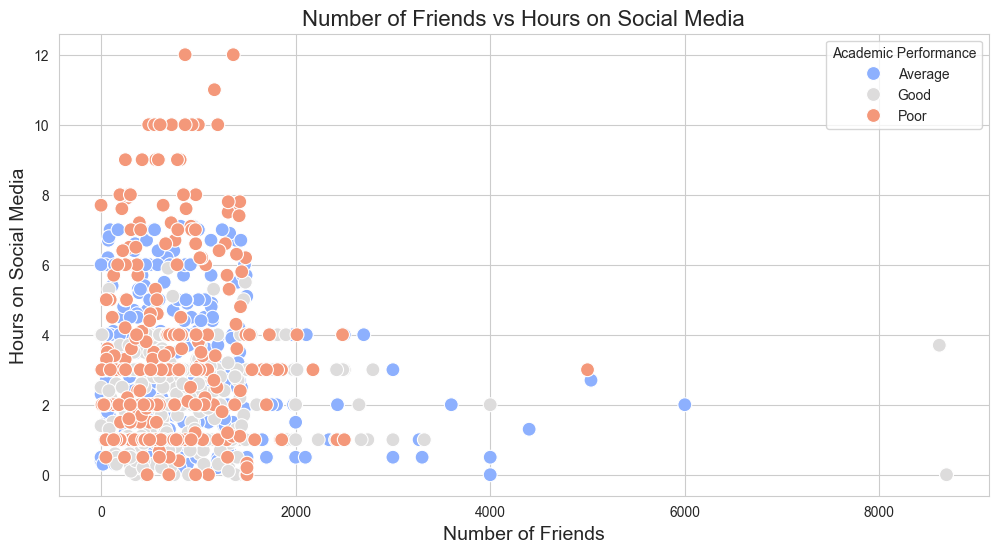

In [133]:
# Scatter Plot: Number of Friends vs Hours on Social Media
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='friends/followers', y='hours_on_social_media', hue='academic_performance', palette='coolwarm', s=100)
plt.title("Number of Friends vs Hours on Social Media", fontsize=16)
plt.xlabel("Number of Friends", fontsize=14)
plt.ylabel("Hours on Social Media", fontsize=14)
plt.legend(title='Academic Performance', loc='upper right')
plt.show()

This analysis is pretty confusing as the relationship of Number of Friends vs Hours on Social Media hued with academic performance is not clear. It is hard to tell whether the number of friends is a good or bad indicator of academic performance based on this plot. because most of the persons have number of friends between 0 and 8000 and hours on social media between 0 and 12. Another thing to note is number of friend may be high but hours of social media can be low also the vice versa can exist. also it is seen that people can have many friends on social media platform but also do good academic result(noticed in some outliers).

In [134]:
# Create a grouped bar chart to visualize academic performance by gender
fig = px.histogram(df, x='gender', color='academic_performance', 
                   title="Academic Performance by Gender",
                   color_discrete_sequence=["green","blue","red"],
                   category_orders={'gender': df['gender'].value_counts().index.tolist()})

fig.update_layout(xaxis_title="Gender",
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=12),
                  yaxis_title_font=dict(size=12),
                  legend_title_text="Academic Performance",
                  legend_title_font=dict(size=12),
                  legend_font=dict(size=10),
                  bargap=0.2)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


As male is more than female in this dataset i will measure the academic performance in percentage for both of them to analyze the scenario. approx 24.3% of the male have poor academic performance and 28.3% of the male have good academic performance. But 47.3% of the male has average academic performance. For female approx 25.5% have poor academic performance and approx 39.3% have good academic performance. But 35.3% of the female has average academic performance. so it can be infered that most of the male has tendency to do average result but the females have more tendency to do good results.

In [135]:
# 'gender' vs 'hours_on_social_media' 
fig = px.box(df, x='gender', y='hours_on_social_media', 
              title="Gender vs Hours on Social Media",
              color='gender', 
              color_discrete_sequence=["green","blue"])

fig.update_layout(xaxis_title="Gender",
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


There is no significant difference between the hours spent on social media by male and female students. Both genders spend approximately the same amount of time on social media. But to state specifically the female students(2.85 hours) spend more time on social media than the male students(2.55 hours).

In [136]:
# Major vs Hours on Social Media plot
fig = px.box(df, x="major", y="hours_on_social_media", 
             title="Hours Spent on Social Media by Major",
             labels={"major": "Major", "hours_on_social_media": "Hours on Social Media"},
             color="major", 
             boxmode="group")
fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Hours on Social Media",
    template="plotly_white"
)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


It is seen that Mechanical majors spend the most time on social media which is 2-4 hours in average. people who are from agriculture major spend 2 hours on social media in average. The majority class i.e. cse majors spend 2.4 hours in social media in average.

In [137]:
# Major vs Academic Performance plot
fig = px.bar(df, x="major", color="academic_performance", 
             title="Academic Performance by Major",
             labels={"major": "Major", "academic_performance": "Academic Performance"},
             category_orders={"academic_performance": ["Poor", "Average", "Good"]})

fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Count of Students",
    template="plotly_white"
)

fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Significant amount of the cse majors have average academic performance. On the other hand in case of business and biology majors the amount of good academic performance is slightly higher than the average category.

# Multivariate Analysis


## Label Encoding

In [138]:
df_copy = df.copy()

posting_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}
df_copy['posting_frequency'] = df_copy['posting_frequency'].map(posting_frequency_mapping)

academic_performance_mapping = {'Good': 2, 'Average': 1, 'Poor': 0}
df_copy['academic_performance'] = df_copy['academic_performance'].map(academic_performance_mapping)

# gender_mapping = {'Male': 0, 'Female': 1} #as no other keeping them in one column
# df_copy['gender'] = df_copy['gender'].map(gender_mapping)
df_copy = pd.get_dummies(df_copy, columns=['gender', 'major', 'social_media_platform'])

scaler = StandardScaler()
columns_to_scale = ['age', 'hours_on_social_media', 'friends/followers','posting_frequency']
df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])

df_copy.head()

,age,hours_on_social_media,posting_frequency,friends/followers,academic_performance,gender_Female,gender_Male,major_Agriculture,major_Arts,major_Biology,...,major_CSE,major_EEE,major_Engineering,major_Psychology,social_media_platform_Facebook,social_media_platform_Instagram,social_media_platform_LinkedIn,social_media_platform_Snapchat,social_media_platform_TikTok,social_media_platform_Twitter
1,0.171301,0.043061,-0.510817,-1.051480,1,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,-0.111538,0.043061,0.458114,-0.302109,1,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.111538,0.043061,-0.510817,-1.064626,1,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
6,0.171301,0.538789,-0.510817,0.164604,1,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
7,0.171301,-0.452667,-0.510817,0.355233,1,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False


## Correlation Matrix and Pairplot

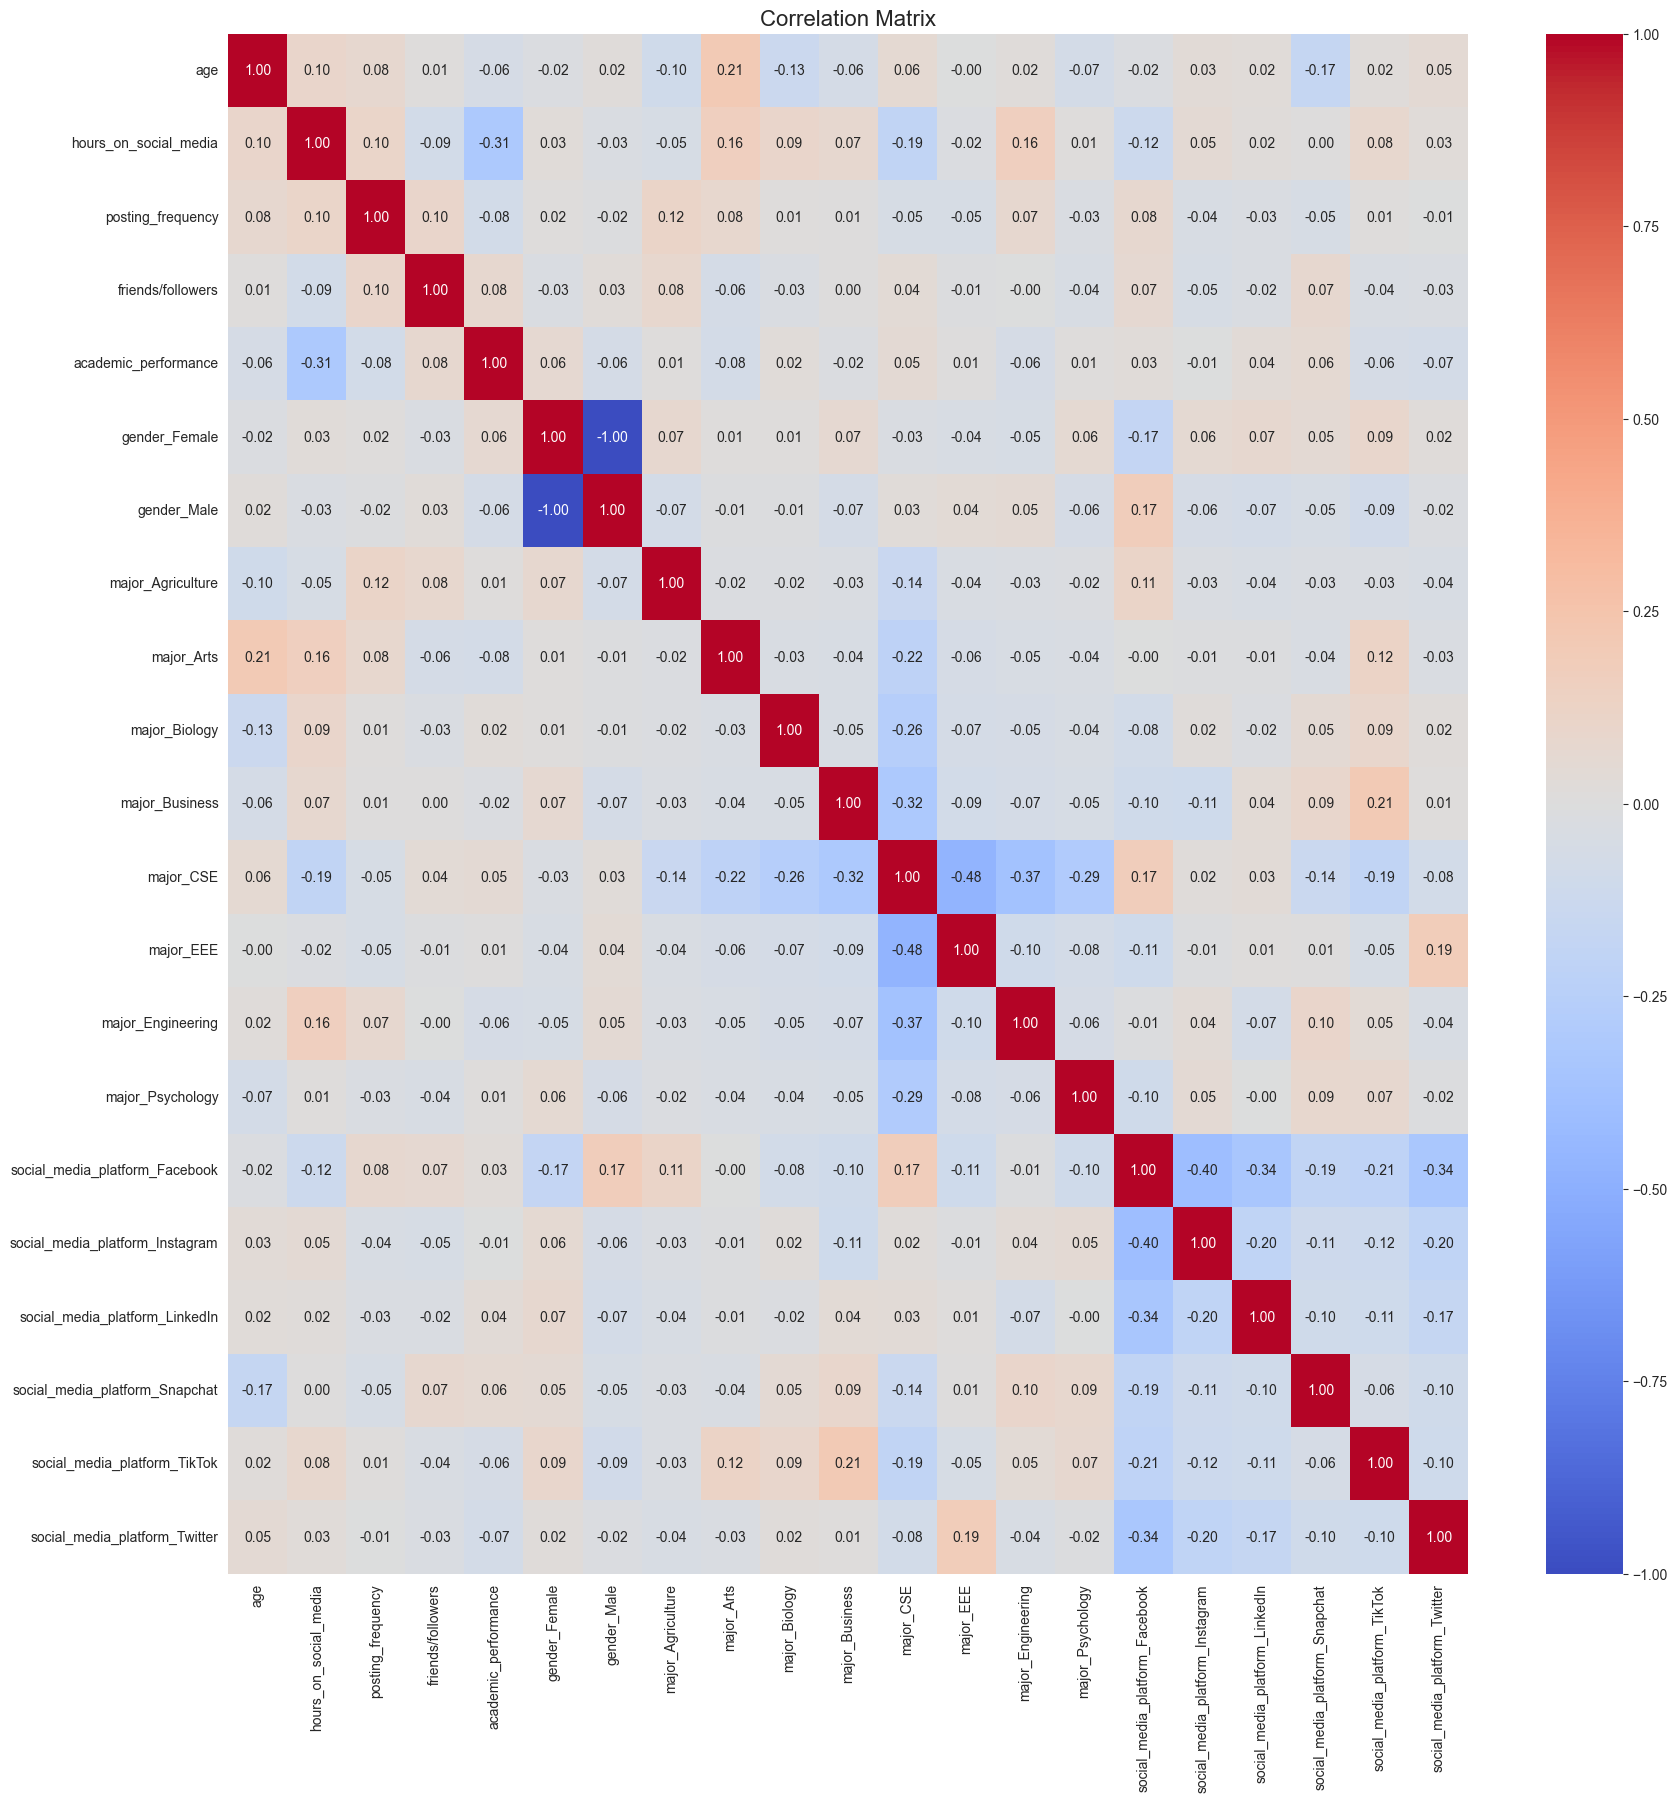

In [139]:
# Correlation Analysis of Numerical Variables
plt.figure(figsize=(20, 20))
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [140]:
df_copy.corr()['academic_performance'].sort_values(ascending=False)


academic_performance               1.000000
friends/followers                  0.075680
gender_Female                      0.063568
social_media_platform_Snapchat     0.062443
major_CSE                          0.047232
social_media_platform_LinkedIn     0.038714
social_media_platform_Facebook     0.025618
major_Biology                      0.023758
major_Agriculture                  0.014635
major_Psychology                   0.010582
major_EEE                          0.006195
social_media_platform_Instagram   -0.005725
major_Business                    -0.019162
social_media_platform_TikTok      -0.055829
age                               -0.056860
major_Engineering                 -0.061563
gender_Male                       -0.063568
social_media_platform_Twitter     -0.070611
major_Arts                        -0.078098
posting_frequency                 -0.079364
hours_on_social_media             -0.313332
Name: academic_performance, dtype: float64

- No Significant correlations to describe w.r.t academic performance except -0.313 with hours on social media which indicates negative correlations.
 - but there are many multicolinearities.


# Summary and Insights
## Univariate Analysis

* **Social Media Usage Duration:**
    - Most participants (the majority) spend 0-8 hours on social media.
    - The highest proportion of users spend 2-3.9 hours on social media, followed by 0-1.9 hours, and 4-5.9 hours.
    - A minimal percentage of users spend greater than or equal to 8 hours on social media, indicating that excessive social media usage is rare.
* **Primary Social Media Platforms:**
    - Facebook is the most commonly used platform (415 people), followed by Instagram (191 people), LinkedIn (141), and Twitter (139).
    - Snapchat is the least used platform, with only 53 users.
* **Gender Distribution:**
    - The gender distribution in the dataset is not equal, with a higher number of male participants (59.6%) compared to female participants (40.4%).
* **Academic Performance:**
    - Most participants (43.2%) report average academic performance (432 people), while good academic performance is reported by 33% of the participants (330 people).
    - Poor academic performance is reported by 23.8% of the participants (238 people).
* **Posting Frequency on Social Media:**
    - The majority of participants post rarely on social media (44.2%, 442 people), while the least frequent group posts daily (6.2%, 62 people).
    - The "sometimes" category shows a moderate number of participants, indicating it is the most common posting frequency.
* **Academic Major Distribution:**
    - Most participants belong to the CSE (Computer Science and Engineering) major (63.4%), while Agriculture has the least representation (1.21%).

## Bivariate Analysis

* **Social Media Usage vs. Academic Performance:**
    - There is a noticeable trend where higher social media usage correlates with lower academic performance.
    - Students with good academic results have a median of 2 hours spent on social media, while those with average and poor academic results have a median of 3 hours.
    - Interestingly, some students with very good academic results still spend more than 7 hours on social media, while some students with poor results spend less than 4 hours on social media. This suggests that academic performance is influenced by multiple factors like study habits, time management, and motivation, and not just social media usage.
* **Social Media Friends/Followers vs. Academic Performance:**
    - The average number of friends or followers is relatively consistent across all academic performance groups (ranging from 651 to 714), indicating that the number of social media connections is not a strong indicator of academic performance.
    - Students with average academic performance tend to have slightly fewer friends/followers.
* **Number of Friends vs. Hours on Social Media by Academic Performance:**
    - The relationship between the number of friends and hours spent on social media is unclear and does not show a definitive correlation with academic performance.
    - Most participants have between 0 to 8000 friends and spend 0 to 12 hours on social media, showing that students with many friends can have either high or low social media usage and vice versa.
    - There are outliers where students with many friends on social media still perform well academically, challenging the assumption that social media activity negatively affects academic performance.
* **Gender vs. Academic Performance:**
    - Male students tend to have a higher percentage of average academic performance (47.3%), while female students have a higher tendency towards good academic performance (39.3%).
    - Male students show a slightly higher percentage (24.3%) of poor academic performance compared to females (25.5%).
* **Social Media Usage by Gender:**
    - On average, female students spend 2.85 hours on social media, while male students spend 2.55 hours.
    - There is no significant difference in social media usage between male and female students, but females tend to use social media slightly more.
* **Social Media Usage by Major:**
    - Mechanical majors spend the most time on social media (average of 2-4 hours), followed by CSE majors (average 2.4 hours) and Agriculture majors (average 2 hours).
    - This indicates that Mechanical students might be more engaged in social media than other majors, possibly due to their academic schedules or lifestyle.
* **Academic Performance by Major:**
    - CSE majors show the highest percentage of average academic performance.
    - Business and Biology majors show a higher percentage of good academic performance compared to their average academic results.

## Multivariate Analysis
* **Correlation Analysis:**
  - No Significant correlations to describe w.r.t academic performance except -0.313 with hours on social media which indicates negative correlations.
  - but there are many multicolinearities.


## Clustering Analysis

In [161]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Kmeans Clustering

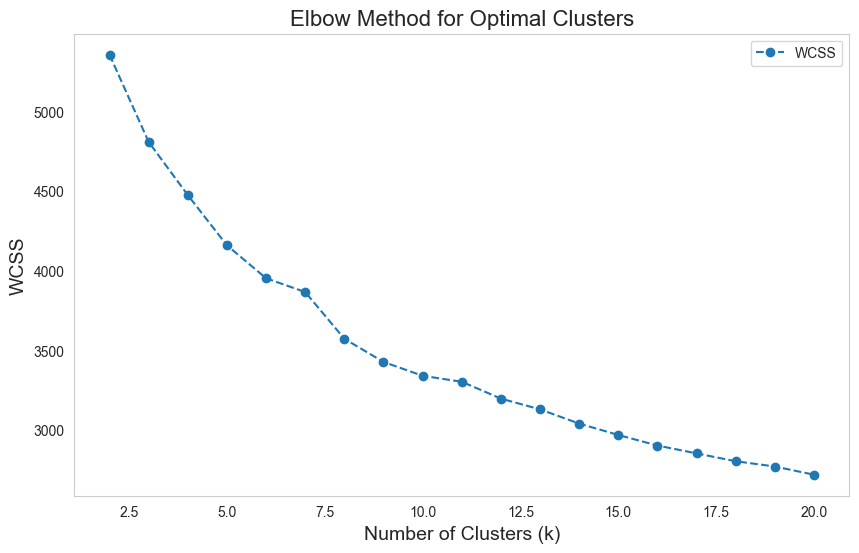

In [142]:
# Elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
db_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_copy)
    #clusters=kmeans.fit_predict(df_copy)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_copy, kmeans.labels_))
    db_scores.append(davies_bouldin_score(df_copy, kmeans.labels_))

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='WCSS')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid()
plt.legend()
plt.show()


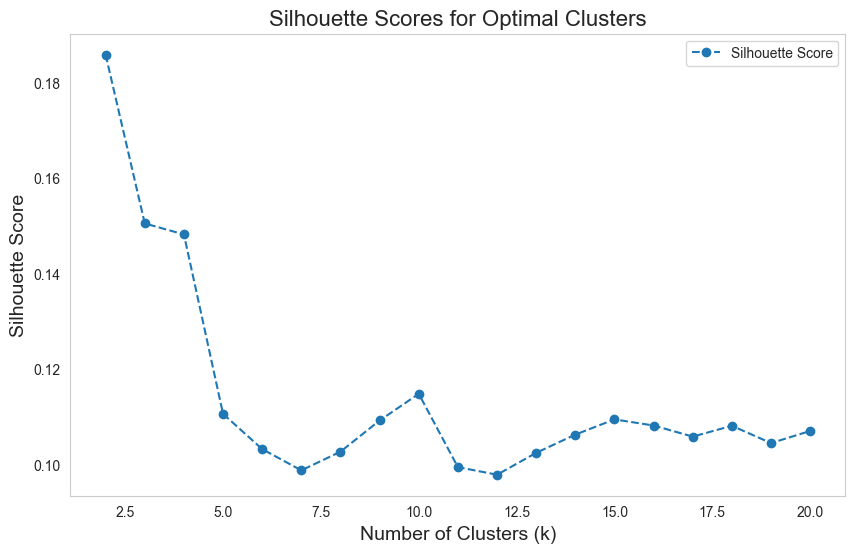

In [143]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.legend()
plt.show()

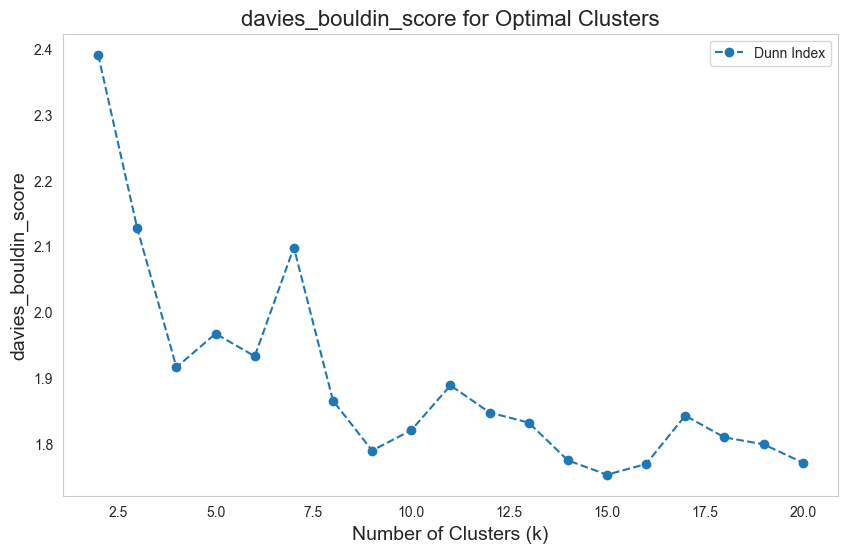

In [144]:
# Plot Dunn Indices
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o', linestyle='--', label='Dunn Index')
plt.title('davies_bouldin_score for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('davies_bouldin_score', fontsize=14)
plt.grid()
plt.legend()
plt.show()

In [145]:
# Choose the optimal number of clusters based on the elbowa k=8 and silhouette method k=2 davies_bouldin_score k=2
optimal_k= 8
optimaoptimal_kl_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

# Print cluster centers
print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  posting_frequency  friends/followers  \
0 -0.723528              -0.557552          -0.289833          -0.292391   
1 -0.538153               1.783893           0.215881          -0.191183   
2  2.940144               1.047563           0.789590          -0.347708   
3  0.568847              -0.117775          -0.591561          -0.219299   
4  0.038200              -0.336912           1.589889           0.332121   
5 -0.235280              -0.694334           0.276439           4.844388   
6  0.508599              -0.210961          -0.360362           0.335251   
7 -0.718424              -0.345478          -0.234896          -0.300533   

   academic_performance  gender_Female   gender_Male  major_Agriculture  \
0              1.216374   3.885781e-16  1.000000e+00       5.847953e-03   
1              0.508333   3.583333e-01  6.416667e-01       6.938894e-18   
2              0.421053   4.210526e-01  5.789474e-01       1.734723e-18 

In [147]:
# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")


Explained Variance by each PCA component: [0.19896708 0.17484859]
Total Variance Explained: 0.37


In [148]:
fig = px.scatter(df_copy, x='pca_1', y='pca_2', color=df_copy['cluster'].astype(str),
                 title="Clustering Results in PCA-Reduced Space",
                 labels={'color': 'Cluster'})
fig.update_layout(title_font_size=20, legend_title_font_size=14, legend_title_text='Cluster')

fig.show()
#fig.show("png")

In [149]:
# Sort features by importance (higher deviation indicates more influence on clusters)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-3])
overall_mean = df_copy.mean()[:-3]
feature_contributions = cluster_centers.apply(lambda x: abs(x - overall_mean), axis=1).mean()
feature_importance = feature_contributions.sort_values(ascending=False)
print("Feature Importance (Based on Deviation from Overall Mean):")
print(feature_importance)


Feature Importance (Based on Deviation from Overall Mean):
friends/followers                  0.857859
age                                0.783897
hours_on_social_media              0.636808
posting_frequency                  0.543556
academic_performance               0.389941
gender_Male                        0.188140
gender_Female                      0.188140
social_media_platform_Facebook     0.156854
major_CSE                          0.141535
social_media_platform_TikTok       0.071848
social_media_platform_LinkedIn     0.061610
social_media_platform_Twitter      0.054552
major_Business                     0.050286
major_Engineering                  0.048106
major_Arts                         0.044294
social_media_platform_Instagram    0.041027
social_media_platform_Snapchat     0.040492
major_EEE                          0.033141
major_Biology                      0.031552
major_Psychology                   0.027909
major_Agriculture                  0.025061
dtype: float64


In [150]:
from kneed import KneeLocator
kl=KneeLocator(range(2, 21), inertia, curve="convex", direction="decreasing")
kl.elbow

np.int64(8)

In [151]:
df_copy.drop(['cluster','pca_1','pca_2'],axis=1,inplace=True)

### KMeans Clustering for k=2 

In [152]:
optimal_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k_considering_silhouette, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  posting_frequency  friends/followers  \
0 -0.112736              -0.345616          -0.319220          -0.028235   
1  0.321844               0.986678           0.911323           0.080607   

   academic_performance  gender_Female  gender_Male  major_Agriculture  \
0              1.238701       0.381356     0.618644           0.011299   
1              0.625000       0.459677     0.540323           0.012097   

   major_Arts  major_Biology  ...  major_CSE  major_EEE  major_Engineering  \
0    0.012712       0.029661  ...   0.696328   0.115819           0.048023   
1    0.064516       0.056452  ...   0.479839   0.104839           0.145161   

   major_Psychology  social_media_platform_Facebook  \
0          0.039548                        0.435028   
1          0.060484                        0.326613   

   social_media_platform_Instagram  social_media_platform_LinkedIn  \
0                         0.192090                        0

In [153]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")

Explained Variance by each PCA component: [0.19896708 0.17484859]
Total Variance Explained: 0.37


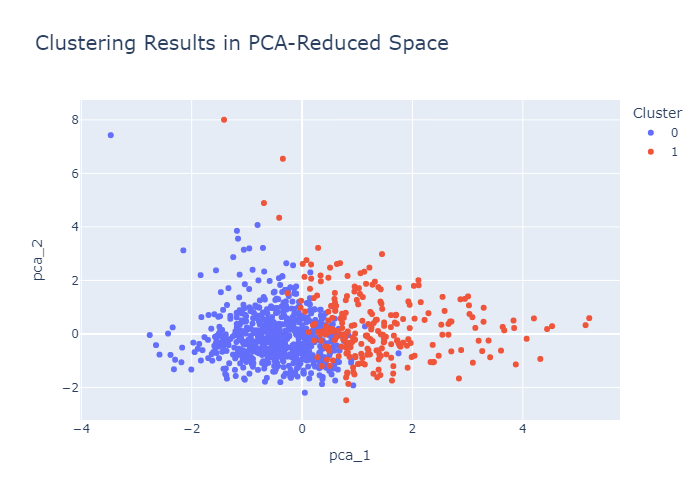

In [154]:
fig = px.scatter(df_copy, x='pca_1', y='pca_2', color=df_copy['cluster'].astype(str),
                 title="Clustering Results in PCA-Reduced Space",
                 labels={'color': 'Cluster'})
fig.update_layout(title_font_size=20, legend_title_font_size=14, legend_title_text='Cluster')
fig.show("png")


In [156]:
# Sort features by importance (higher deviation indicates more influence on clusters)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-3])
overall_mean = df_copy.mean()[:-3]
feature_contributions = cluster_centers.apply(lambda x: abs(x - overall_mean), axis=1).mean()
feature_importance = feature_contributions.sort_values(ascending=False)
print("Feature Importance (Based on Deviation from Overall Mean):")
print(feature_importance)

Feature Importance (Based on Deviation from Overall Mean):
hours_on_social_media              0.666147
posting_frequency                  0.615272
academic_performance               0.306850
age                                0.217290
major_CSE                          0.108244
friends/followers                  0.054421
social_media_platform_Facebook     0.054208
major_Engineering                  0.048569
gender_Female                      0.039161
gender_Male                        0.039161
social_media_platform_TikTok       0.032543
major_Arts                         0.025902
major_Business                     0.015001
social_media_platform_Twitter      0.013555
major_Biology                      0.013395
major_Psychology                   0.010468
social_media_platform_LinkedIn     0.010024
major_EEE                          0.005490
social_media_platform_Snapchat     0.002643
social_media_platform_Instagram    0.000729
major_Agriculture                  0.000399
dtype: float64


### PCA in 3 dimensions

In [157]:
df_copy.drop(['cluster','pca_1','pca_2'],axis=1,inplace=True)

In [158]:
optimal_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k_considering_silhouette, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  posting_frequency  friends/followers  \
0 -0.112736              -0.345616          -0.319220          -0.028235   
1  0.321844               0.986678           0.911323           0.080607   

   academic_performance  gender_Female  gender_Male  major_Agriculture  \
0              1.238701       0.381356     0.618644           0.011299   
1              0.625000       0.459677     0.540323           0.012097   

   major_Arts  major_Biology  ...  major_CSE  major_EEE  major_Engineering  \
0    0.012712       0.029661  ...   0.696328   0.115819           0.048023   
1    0.064516       0.056452  ...   0.479839   0.104839           0.145161   

   major_Psychology  social_media_platform_Facebook  \
0          0.039548                        0.435028   
1          0.060484                        0.326613   

   social_media_platform_Instagram  social_media_platform_LinkedIn  \
0                         0.192090                        0

In [159]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]
df_copy['pca_3'] = pca_result[:, 2]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")

Explained Variance by each PCA component: [0.19896708 0.17484859 0.14734883]
Total Variance Explained: 0.52


In [160]:
fig = px.scatter_3d( df_copy, x='pca_1', y='pca_2', z='pca_3', color='cluster', title='3D Visualization of Clusters',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'}, opacity=0.7)

fig.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(scene=dict(xaxis_title='PCA1', yaxis_title='PCA2', zaxis_title='PCA3'))
fig.show()
#fig.show("png")


## Analysis and Insights

**Comparison of Clustering Metrics**

- **Elbow Method for Optimal k (Inertia Analysis):**
    - Inertia decreases significantly up to k=8 based on the Elbow Method, as determined using KneeLocator. Beyond this point, the rate of decrease in inertia becomes less prominent. Trends are : Steep Decline in Inertia (k=2 to k=8), Diminishing Returns After k=8 ,Flat Deline (k=8 to 20).
- **Silhouette Scores:**
    - Silhouette scores across clusters are relatively low overall, indicating a lack of clear separation between clusters The maximum silhouette score occurs at k=2, suggesting a better-defined cluster structure when dividing the dataset into two clusters.
- **Davis-Bouldin Scores:**
    - Overall low, indicating a lack of clear separation between clusters The maximum silhouette score occurs at k=2, suggesting a better-defined cluster structure when dividing the dataset into two clusters.
- **PCA Variance Explanation:**
    - The first two PCA components explain 37% of the total variance in the data. While this is not very high, it provides a starting point for visualization and dimensionality reduction.


**Feature Importance Insights**

- **For k=8:**
    - **Dominant Features:**
        - friends/followers and age are the most significant features.
        - hours_on_social_media and posting_frequency are also key contributors.
- **For k=2:**
    - **Dominant Features:**
        - hours_on_social_media emerges as the most influential feature.
        - posting_frequency is the second most important feature.

**Clustering Insights**

- **k=8 Clusters:**
    - Divides the dataset into finer groups, capturing features like friends/followers and age.
- **k=2 Clusters:**
    - Provides a broader segmentation of the dataset, highlighting significant divides based on hours_on_social_media and academic_performance and posting frequency.
- **Optimal Number of Clusters:**
    - While the elbow method suggests k=9, silhouette and davis-bouldin scores recommend k=2. The choice between these depends on whether finer segmentation or broad categorization is desired.
- **3d Plotting for k=2**    
    - The clusters (colored blue and yellow) show not a reasonable separation in the 3D PCA space. However, many overlap is seen which means that there are  same characteristics between the two groups.

